<a href="https://colab.research.google.com/github/linagraf/Machine-Learning-Final-Project-/blob/main/MAS651_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load packages
import os
import json
from collections import Counter
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from google.colab import drive

In [ ]:
#Connect to drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defining paths and connecting to drive
BUSINESS_PATH = "/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_business.json"
CHECKIN_PATH  = "/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_checkin.json"
REVIEW_PATH   = "/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_review.json"

for p in [BUSINESS_PATH, CHECKIN_PATH, REVIEW_PATH]:
    print(p, "exists:", os.path.exists(p), "| size (bytes):", os.path.getsize(p) if os.path.exists(p) else None)

/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_business.json exists: True | size (bytes): 118863795
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_checkin.json exists: True | size (bytes): 286958945
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_review.json exists: True | size (bytes): 5341868833


In [ ]:
#Filtering the business to be "Restaurants in Tampa with >= 20 reviews"
business_df = pd.read_json(BUSINESS_PATH, lines=True)

filtered_business_df = business_df[
    (business_df["city"] == "Tampa") &
    (business_df["review_count"] >= 20) &
    (business_df["categories"].fillna("").str.contains("Restaurants", case=False))
].copy()

keep_cols = ["business_id", "name", "city", "state", "stars", "review_count", "categories", "is_open"]
filtered_business_df = filtered_business_df[[c for c in keep_cols if c in filtered_business_df.columns]]

biz_ids = set(filtered_business_df["business_id"])

print("Filtered businesses:", filtered_business_df.shape)
filtered_business_df.head()

Filtered businesses: (2026, 8)


,business_id,name,city,state,stars,review_count,categories,is_open
58,uI9XODGY_2_ieTE6xJ0myw,Roman Forum,Tampa,FL,4.0,23,"Restaurants, American (New), Italian",0
59,JgpnXv_0XhV3SfbfB50nxw,Joe's Pizza,Tampa,FL,4.0,35,"Restaurants, Pizza",0
224,Ucl9Vo5lwrUmYbV8Dv8X5g,O'Briens Irish Pub,Tampa,FL,4.0,108,"Bars, Pubs, Nightlife, Arts & Entertainment, I...",1
242,xbRbvXSAVZBEwaUUn3mzbg,Lee Roy Selmon's,Tampa,FL,3.5,42,"Salad, Restaurants, Burgers, Soul Food",0
254,VVvUBlc_WIEb8obKGq39dA,Four Green Fields,Tampa,FL,4.5,39,"Irish Pub, Bars, Restaurants, Irish, Nightlife",1


In [ ]:
#Doublechecking that the dataset was found in Drive
print("Searching for 'yelp' related files in your Google Drive...")
yelp_files_found = False
for root, dirs, files in os.walk("/content/drive/MyDrive"):
    for name in files + dirs:
        if "yelp" in name.lower():
            print(os.path.join(root, name))
            yelp_files_found = True

if not yelp_files_found:
    print("No files or folders containing 'yelp' found in your Google Drive.")
    print("Please ensure the 'yelp_dataset' is added to your 'My Drive' and contains the dataset files.")
else:
    print("\nAbove are the paths where 'yelp' related files/folders were found. Please verify if any of these paths correspond to your dataset and update BUSINESS_PATH, REVIEW_PATH, and CHECKIN_PATH accordingly.")

Searching for 'yelp' related files in your Google Drive...
/content/drive/MyDrive/Yelp_dataset
/content/drive/MyDrive/yelp_dataset
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_business.json.zip
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_checkin.json.zip
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_review.json.zip
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_business.json
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_checkin.json
/content/drive/MyDrive/Yelp_dataset/yelp_academic_dataset_review.json

Above are the paths where 'yelp' related files/folders were found. Please verify if any of these paths correspond to your dataset and update BUSINESS_PATH, REVIEW_PATH, and CHECKIN_PATH accordingly.


In [ ]:
#Finding the shape and head of the monthly check-ins dataset
biz_month_counter = Counter()

with open(CHECKIN_PATH, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        bid = obj["business_id"]
        if bid not in biz_ids:
            continue

        dates = obj.get("date", "")
        if not dates:
            continue

        for ts in dates.split(", "):
            ym = ts[:7]
            biz_month_counter[(bid, ym)] += 1

monthly_checkins = pd.DataFrame(
    [(bid, ym, cnt) for (bid, ym), cnt in biz_month_counter.items()],
    columns=["business_id","year_month","checkins"]
)

monthly_checkins["year_month"] = pd.to_datetime(monthly_checkins["year_month"] + "-01")
monthly_checkins = monthly_checkins.sort_values(["business_id","year_month"])

print("Monthly checkins:", monthly_checkins.shape)
monthly_checkins.head()
biz_month_counter = Counter()

with open(CHECKIN_PATH, "r", encoding="utf-8") as f:
    for line in f:
        obj = json.loads(line)
        bid = obj["business_id"]

        if bid not in biz_ids:
            continue

        dates = obj.get("date", "")
        if not dates:
            continue

        for ts in dates.split(", "):
            ym = ts[:7]
            biz_month_counter[(bid, ym)] += 1

monthly_checkins = pd.DataFrame(
    [(bid, ym, cnt) for (bid, ym), cnt in biz_month_counter.items()],
    columns=["business_id", "year_month", "checkins"]
)

monthly_checkins["year_month"] = pd.to_datetime(monthly_checkins["year_month"] + "-01")
monthly_checkins = monthly_checkins.sort_values(["business_id", "year_month"])

print("Monthly checkins rows:", monthly_checkins.shape)
monthly_checkins.head()

Monthly checkins: (108107, 3)
Monthly checkins rows: (108107, 3)


,business_id,year_month,checkins
0,-0i2KNr7WrCsDF5m0IViJg,2010-03-01,1
1,-0i2KNr7WrCsDF5m0IViJg,2010-08-01,2
2,-0i2KNr7WrCsDF5m0IViJg,2010-09-01,2
3,-0i2KNr7WrCsDF5m0IViJg,2010-10-01,3
4,-0i2KNr7WrCsDF5m0IViJg,2011-01-01,3


In [ ]:
#Finding the shape and head of the review dataset
chunks = []
CHUNK_SIZE = 100_000

for chunk in pd.read_json(REVIEW_PATH, lines=True, chunksize=CHUNK_SIZE):
    chunk = chunk[chunk["business_id"].isin(biz_ids)]
    chunk = chunk[["review_id","user_id","business_id","stars","date","useful", "text"]]
    chunks.append(chunk)

review_df = pd.concat(chunks, ignore_index=True)
review_df["date"] = pd.to_datetime(review_df["date"], errors="coerce")

print("Filtered reviews:", review_df.shape)
review_df.head()

Filtered reviews: (293052, 7)


,review_id,user_id,business_id,stars,date,useful,text
0,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,2014-10-11 16:22:06,0,"Great place for breakfast! I had the waffle, w..."
1,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,2018-02-11 03:11:20,0,Skip this train wreck if you are looking for d...
2,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,2013-12-07 13:17:13,0,Service and management terrible... After messi...
3,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,2018-03-04 00:20:24,1,Not sure why it took until now for us to find ...
4,wsFRDsHxz2mM_Ettgn1qQg,x8ErSBur0SsnL1lZwP5o4Q,qf4LecJDQWIt0gt6VJWFPw,4,2017-06-28 01:07:04,0,We got diverted to Tampa and decided to make t...


In [ ]:
#Finding the shape of the users
user_counts = review_df["user_id"].value_counts()
valid_users = set(user_counts[user_counts >= 5].index)

review_df = review_df[review_df["user_id"].isin(valid_users)].copy()

print("After user>=5:", review_df.shape)

After user>=5: (149190, 6)


In [ ]:
biz_counts = review_df["business_id"].value_counts()
valid_biz = set(biz_counts[biz_counts >= 20].index)

review_df = review_df[review_df["business_id"].isin(valid_biz)].copy()
filtered_business_df = filtered_business_df[filtered_business_df["business_id"].isin(valid_biz)].copy()
monthly_checkins = monthly_checkins[monthly_checkins["business_id"].isin(valid_biz)].copy()

print("Final shapes")
print("business:", filtered_business_df.shape)
print("reviews:", review_df.shape)
print("checkins:", monthly_checkins.shape)


Final shapes
business: (1476, 8)
reviews: (141892, 6)
checkins: (94702, 3)


In [ ]:
OUT_DIR = "/content/drive/MyDrive/yelp_dataset/processed_tampa_restaurants"
os.makedirs(OUT_DIR, exist_ok=True)

filtered_business_df.to_csv(f"{OUT_DIR}/business.csv", index=False)
review_df.to_csv(f"{OUT_DIR}/reviews.csv", index=False)
monthly_checkins.to_csv(f"{OUT_DIR}/monthly_checkins.csv", index=False)

print("Saved to:", OUT_DIR)

Saved to: /content/drive/MyDrive/yelp_dataset/processed_tampa_restaurants


**Part 1: EDA**

In [ ]:
#Getting review averages
print(f"Average Star Rating across all reviews: {review_df['stars'].mean():.2f}")
print(f"Average 'Useful' votes per review: {review_df['useful'].mean():.2f}")
print(f"Average number of check-ins per monthly record: {monthly_checkins['checkins'].mean():.2f}")

Average Star Rating across all reviews: 3.92
Average 'Useful' votes per review: 1.59
Average number of check-ins per monthly record: 5.53


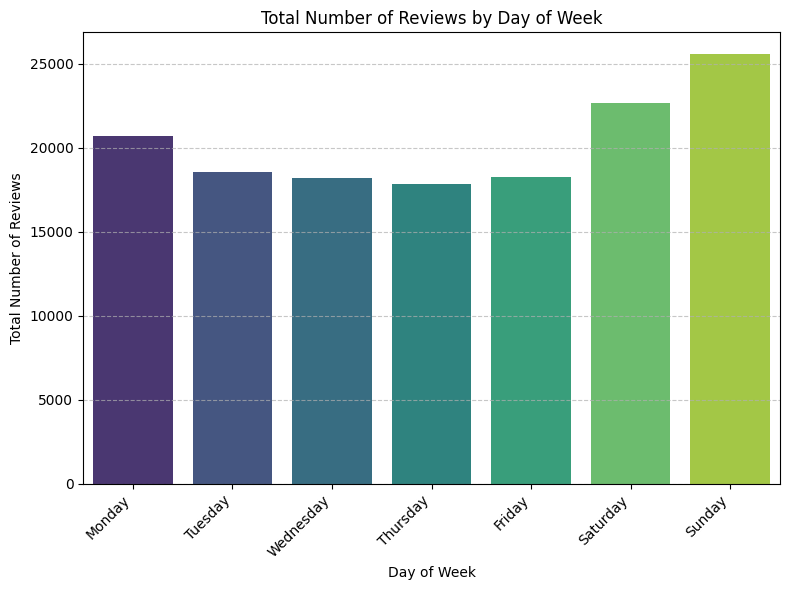

Total number of reviews by day of week:
day_of_week
Monday       20726
Tuesday      18583
Wednesday    18190
Thursday     17844
Friday       18292
Saturday     22656
Sunday       25601
Name: count, dtype: int64


In [ ]:
# Defining the order of days of the week
day_order = [calendar.day_name[i] for i in range(7)]

# Ensure 'day_of_week' column exists in review_df
if 'day_of_week' not in review_df.columns:
    review_df['day_of_week'] = review_df['date'].dt.day_name()

# Calculate reviews by day of week
reviews_by_day = review_df['day_of_week'].value_counts()

# Reindexing the series to ensure the days are in order
reviews_by_day = reviews_by_day.reindex(day_order)

#Plotting the Total number of reviews by day
plt.figure(figsize=(8, 6))
sns.barplot(x=reviews_by_day.index, y=reviews_by_day.values, palette='viridis', hue=reviews_by_day.index, legend=False)
plt.title('Total Number of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Total number of reviews by day of week:")
print(reviews_by_day)

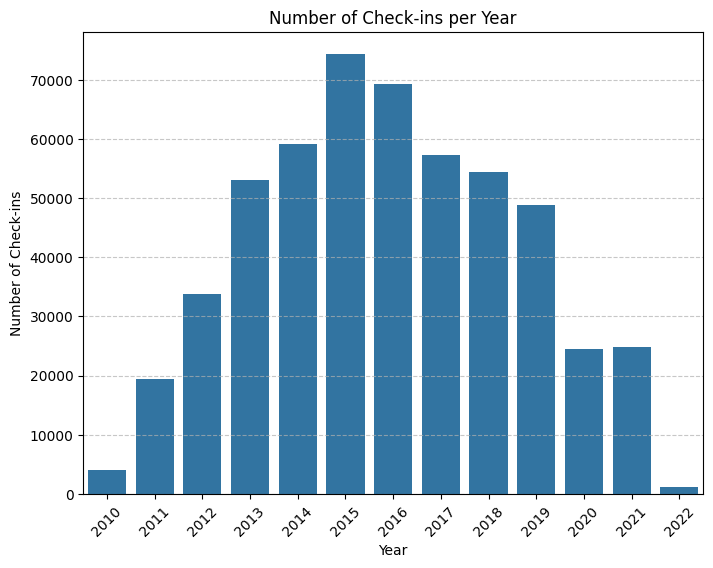

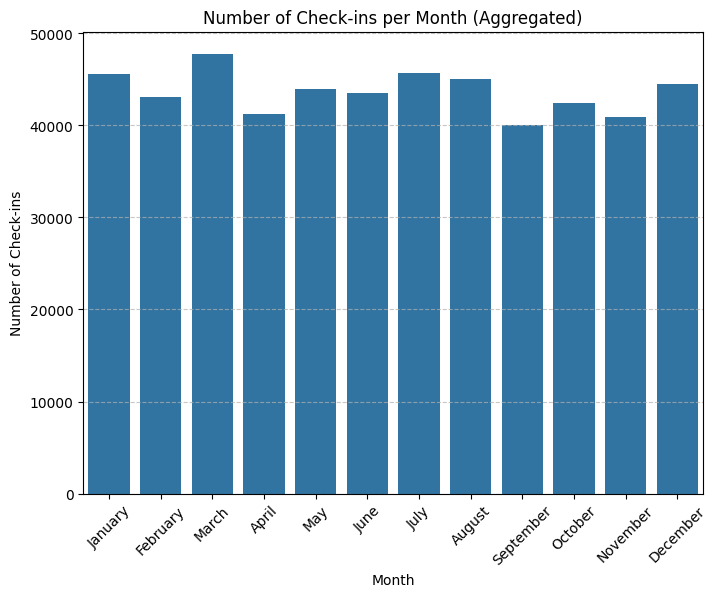

In [ ]:
#Plots of yearly and monthly check-ins (aggregated)

# --- Yearly check-ins ---
yearly_checkins = (
    monthly_checkins
    .assign(year=monthly_checkins["year_month"].dt.year)
    .groupby("year")["checkins"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_checkins.index, y=yearly_checkins.values)
plt.title("Number of Check-ins per Year")
plt.xlabel("Year")
plt.ylabel("Number of Check-ins")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# --- Monthly check-ins across all years ---
monthly_checkins_agg = (
    monthly_checkins
    .assign(month=monthly_checkins["year_month"].dt.month_name())
    .groupby("month")["checkins"]
    .sum()
    .reindex(list(calendar.month_name)[1:])  # Jan..Dec in order
)

plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_checkins_agg.index, y=monthly_checkins_agg.values)
plt.title("Number of Check-ins per Month (Aggregated)")
plt.xlabel("Month")
plt.ylabel("Number of Check-ins")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

/tmp/ipython-input-75644121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_rating_counts.index, y=star_rating_counts.values, palette='viridis')


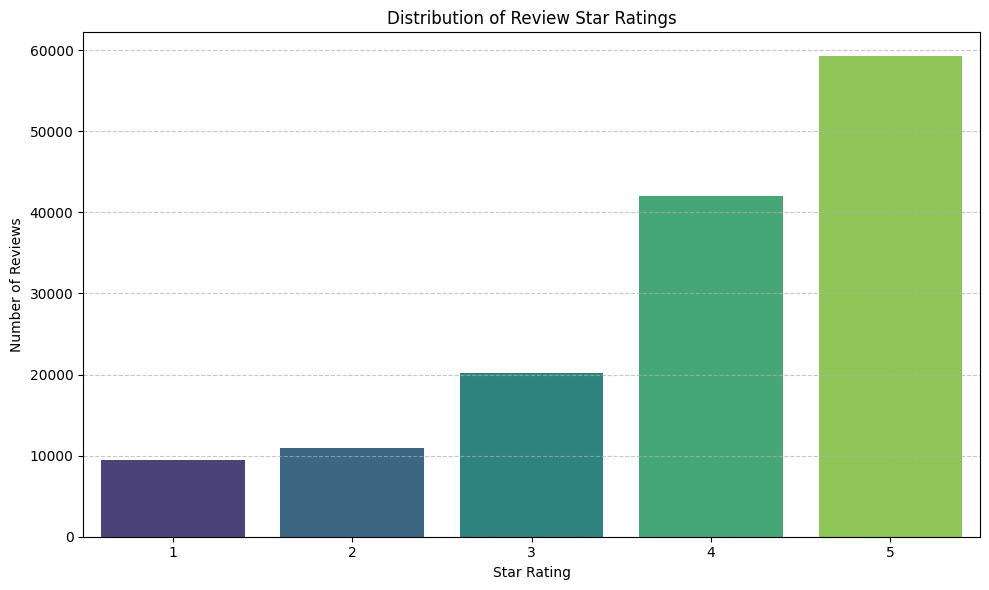

In [ ]:
#Barplot of Distribution of Review Star Ratings
star_rating_counts = review_df['stars'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=star_rating_counts.index, y=star_rating_counts.values, palette='viridis')
plt.title('Distribution of Review Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

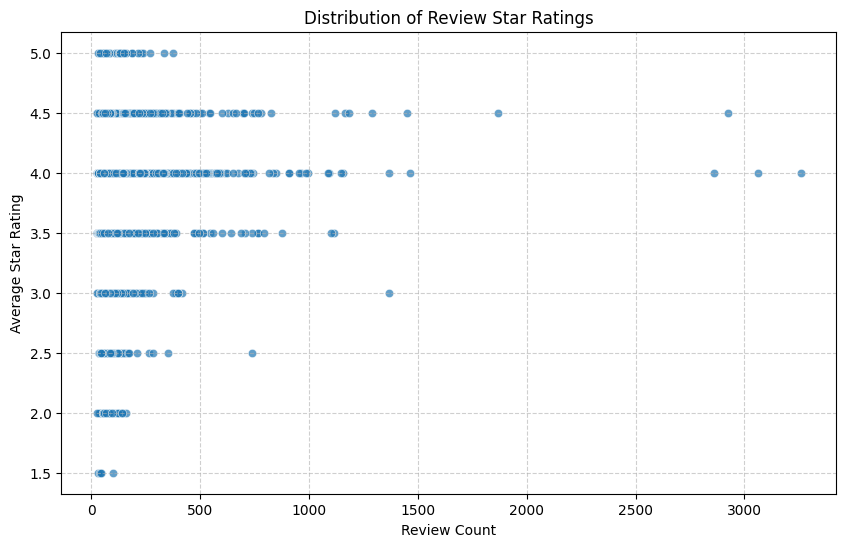

In [ ]:
#Plotting Distribution of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars', data=filtered_business_df, alpha=0.7)
plt.title('Distribution of Review Star Ratings')
plt.xlabel('Review Count')
plt.ylabel('Average Star Rating')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Part 2: Recommender system + Popularity bias**


For each user, recommend K businesses they have not yet interacted with. Interactions can be explicit (stars) or implicit (check-ins/tips).

In [ ]:
#Building a recommender for explicit interactions
user_interactions = review_df.groupby("user_id")["business_id"].apply(set)

biz_popularity = review_df["business_id"].value_counts()
popular_biz_sorted = list(biz_popularity.index)

K = 5

recommendations = []

for user, seen_biz in user_interactions.items():
    recs = []
    for biz in popular_biz_sorted:
        if biz not in seen_biz:
            recs.append(biz)
        if len(recs) == K:
            break

    for biz in recs:
        recommendations.append((user, biz))

recommended_df = pd.DataFrame(recommendations, columns=["user_id", "business_id"])

print("Recommendation shape:", recommended_df.shape)
recommended_df.head()

Recommendation shape: (53585, 2)


,user_id,business_id
0,---2PmXbF47D870stH1jqA,dsfRniRgfbDjC8os848B6A
1,---2PmXbF47D870stH1jqA,p_qSQwShIgQnNxGcajI4-w
2,---2PmXbF47D870stH1jqA,KXecZki-_3N7afs6HKWM3A
3,---2PmXbF47D870stH1jqA,cE_gYW3CHEducTkEyxTDdA
4,---2PmXbF47D870stH1jqA,RqW9S4WG9UYZHKhHRHXJZg


The Cold-Start Problem: How your system handles new businesses (few reviews) or new users.

Popularity bias (average popularity of recommended items vs. catalog)

In [ ]:
#Popularity proxy = number of reviews in filtered review_df
biz_popularity = review_df["business_id"].value_counts()

#Catalog average popularity
all_catalog_pop = biz_popularity.mean()

#Recommended average popularity
recommended_pop = recommended_df["business_id"].map(biz_popularity)
avg_recommended_pop = recommended_pop.mean()

#Ratio + Difference
popularity_ratio = avg_recommended_pop / all_catalog_pop
popularity_difference = avg_recommended_pop - all_catalog_pop

print("Avg popularity (catalog):", round(all_catalog_pop, 2))
print("Avg popularity (recommended):", round(avg_recommended_pop, 2))
print("Popularity ratio:", round(popularity_ratio, 3))
print("Popularity difference:", round(popularity_difference, 2))


Avg popularity (catalog): 96.13
Avg popularity (recommended): 1177.96
Popularity ratio: 12.254
Popularity difference: 1081.83


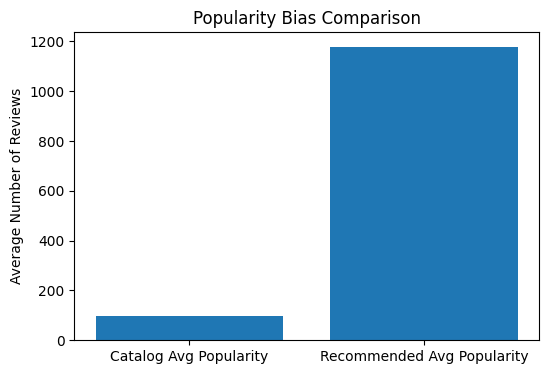

In [ ]:
#Plot the popularity bias comparison
plt.figure(figsize=(6,4))
plt.bar(
    ["Catalog Avg Popularity", "Recommended Avg Popularity"],
    [all_catalog_pop, avg_recommended_pop]
)

plt.title("Popularity Bias Comparison")
plt.ylabel("Average Number of Reviews")
plt.show()

**Part 3: Predictive Analysis**

Predict whether a new review will be high-impact (e.g., top-quartile “useful” votes) or predict the number of useful votes. (useful (regression) or useful ≥ threshold (classification).)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score, classification_report,
    confusion_matrix, roc_curve, mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Text-based features (5 new)
review_df["text_length"]    = review_df["text"].str.len()
review_df["word_count"]     = review_df["text"].str.split().str.len()
review_df["exclaim_count"]  = review_df["text"].str.count("!")
review_df["question_count"] = review_df["text"].str.count(r"\?")
review_df["caps_ratio"]     = (
    review_df["text"].str.count(r"[A-Z]") /
    review_df["text_length"].clip(lower=1)
)

# Date features (original 3)
review_df["year"]            = review_df["date"].dt.year
review_df["month"]           = review_df["date"].dt.month
review_df["day_of_week_num"] = review_df["date"].dt.dayofweek

# Business-level features (3 new)
biz_features = filtered_business_df[["business_id", "stars", "review_count", "is_open"]].copy()
biz_features.columns = ["business_id", "biz_stars", "biz_review_count", "biz_is_open"]
review_model = review_df.merge(biz_features, on="business_id", how="left")

# Check-in features (1 new)
if "monthly_checkins" in dir() and not monthly_checkins.empty:
    biz_checkins = monthly_checkins.groupby("business_id")["checkins"].sum().reset_index()
    biz_checkins.columns = ["business_id", "total_checkins"]
    review_model = review_model.merge(biz_checkins, on="business_id", how="left")
    review_model["total_checkins"] = review_model["total_checkins"].fillna(0)
else:
    review_model["total_checkins"] = 0

# Define target
useful_threshold = review_model["useful"].quantile(0.75)
print(f"Useful votes 75th percentile (threshold): {useful_threshold}")

if useful_threshold == 0:
    print("Threshold is 0 → using useful >= 1 as high-impact")
    review_model["is_high_impact"] = (review_model["useful"] >= 1).astype(int)
else:
    review_model["is_high_impact"] = (review_model["useful"] >= useful_threshold).astype(int)

print(f"\nClass distribution:")
print(review_model["is_high_impact"].value_counts())
print(review_model["is_high_impact"].value_counts(normalize=True).round(3))

# All 13 features
feature_cols = [
    "stars", "year", "month", "day_of_week_num",       # original 4
    "text_length", "word_count", "exclaim_count",       # new: text features
    "question_count", "caps_ratio",                     # new: text features
    "biz_stars", "biz_review_count", "biz_is_open",    # new: business features
    "total_checkins",                                   # new: check-in feature
]

model_df = review_model[feature_cols + ["is_high_impact", "useful"]].dropna()

X = model_df[feature_cols]
y_cls = model_df["is_high_impact"]
y_reg = model_df["useful"]

X_train, X_test, y_train_cls, y_test_cls, y_train_reg, y_test_reg = train_test_split(
    X, y_cls, y_reg, test_size=0.30, random_state=42, stratify=y_cls
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

print(f"\nDataset: {model_df.shape[0]} rows | Features: {len(feature_cols)}")
print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Useful votes 75th percentile (threshold): 1.0

Class distribution:
is_high_impact
0    174369
1    118683
Name: count, dtype: int64
is_high_impact
0    0.595
1    0.405
Name: proportion, dtype: float64

Dataset: 276247 rows | Features: 13
Train: 193372 | Test: 82875


PART A: CLASSIFICATION (High-Impact Review)

*   Train Classification Models

In [ ]:
print("="*60)
print("   PART A: CLASSIFICATION — High-Impact Review Prediction")
print("="*60)
print(f"\nTarget: review is 'high-impact' if useful votes >= {useful_threshold}")
print(f"Features used ({len(feature_cols)}): {feature_cols}\n")

models_cls = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree":       DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest":       RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    "Gradient Boosting":   GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42),
}

cls_results = []

for name, model in models_cls.items():
    print(f"\n--- Training {name} ---")

    if name == "Logistic Regression":
        model.fit(X_train_sc, y_train_cls)
        y_pred  = model.predict(X_test_sc)
        y_proba = model.predict_proba(X_test_sc)[:, 1]
        cv_scores = cross_val_score(model, X_train_sc, y_train_cls, cv=5, scoring="roc_auc")
    else:
        model.fit(X_train, y_train_cls)
        y_pred  = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        cv_scores = cross_val_score(model, X_train, y_train_cls, cv=5, scoring="roc_auc")

    acc = accuracy_score(y_test_cls, y_pred)
    auc = roc_auc_score(y_test_cls, y_proba)
    f1  = f1_score(y_test_cls, y_pred)
    cv_mean = cv_scores.mean()

    print(f"  CV AUC: {cv_mean:.4f} | Test AUC: {auc:.4f} | Accuracy: {acc:.4f} | F1: {f1:.4f}")
    print(classification_report(y_test_cls, y_pred, target_names=["Not High-Impact", "High-Impact"]))

    cls_results.append({
        "Model": name, "CV_AUC": round(cv_mean, 4),
        "Test_AUC": round(auc, 4), "Accuracy": round(acc, 4), "F1": round(f1, 4)
    })

   PART A: CLASSIFICATION — High-Impact Review Prediction

Target: review is 'high-impact' if useful votes >= 1.0
Features used (13): ['stars', 'year', 'month', 'day_of_week_num', 'text_length', 'word_count', 'exclaim_count', 'question_count', 'caps_ratio', 'biz_stars', 'biz_review_count', 'biz_is_open', 'total_checkins']


--- Training Logistic Regression ---
  CV AUC: 0.6976 | Test AUC: 0.7016 | Accuracy: 0.6655 | F1: 0.4578
                 precision    recall  f1-score   support

Not High-Impact       0.67      0.88      0.76     49378
    High-Impact       0.66      0.35      0.46     33497

       accuracy                           0.67     82875
      macro avg       0.66      0.61      0.61     82875
   weighted avg       0.67      0.67      0.64     82875


--- Training Decision Tree ---
  CV AUC: 0.6969 | Test AUC: 0.7018 | Accuracy: 0.6692 | F1: 0.5276
                 precision    recall  f1-score   support

Not High-Impact       0.69      0.81      0.75     49378
    High-

*   Classification Comparison Table

In [ ]:
print("="*60)
print("   PART A: CLASSIFICATION MODEL COMPARISON")
print("="*60)
results_df = pd.DataFrame(cls_results).sort_values("Test_AUC", ascending=False)
print(results_df.to_string(index=False))

   PART A: CLASSIFICATION MODEL COMPARISON
              Model  CV_AUC  Test_AUC  Accuracy     F1
  Gradient Boosting  0.7279    0.7301    0.6860 0.5553
      Random Forest  0.7182    0.7216    0.6793 0.5380
      Decision Tree  0.6969    0.7018    0.6692 0.5276
Logistic Regression  0.6976    0.7016    0.6655 0.4578


*   Confusion Matrices

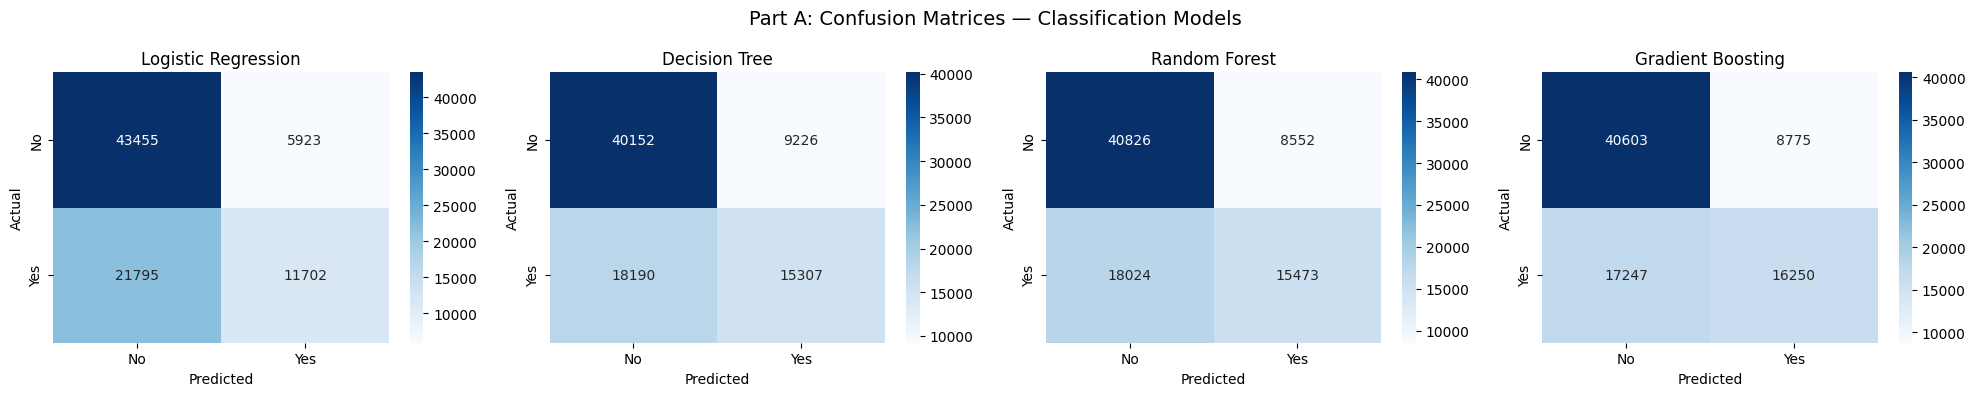

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle("Part A: Confusion Matrices — Classification Models", fontsize=14)

for idx, (name, model) in enumerate(models_cls.items()):
    if name == "Logistic Regression":
        y_pred = model.predict(X_test_sc)
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test_cls, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx],
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()

*   ROC Curves

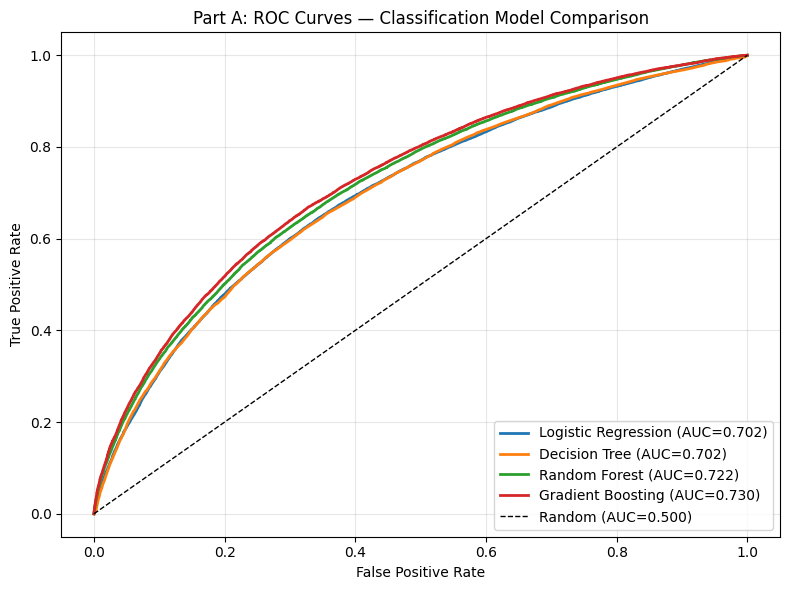

In [ ]:
plt.figure(figsize=(8, 6))

for name, model in models_cls.items():
    if name == "Logistic Regression":
        y_proba = model.predict_proba(X_test_sc)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
    auc = roc_auc_score(y_test_cls, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=1, label="Random (AUC=0.500)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Part A: ROC Curves — Classification Model Comparison")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


*   Feature Importance

Best classification model by AUC: Gradient Boosting


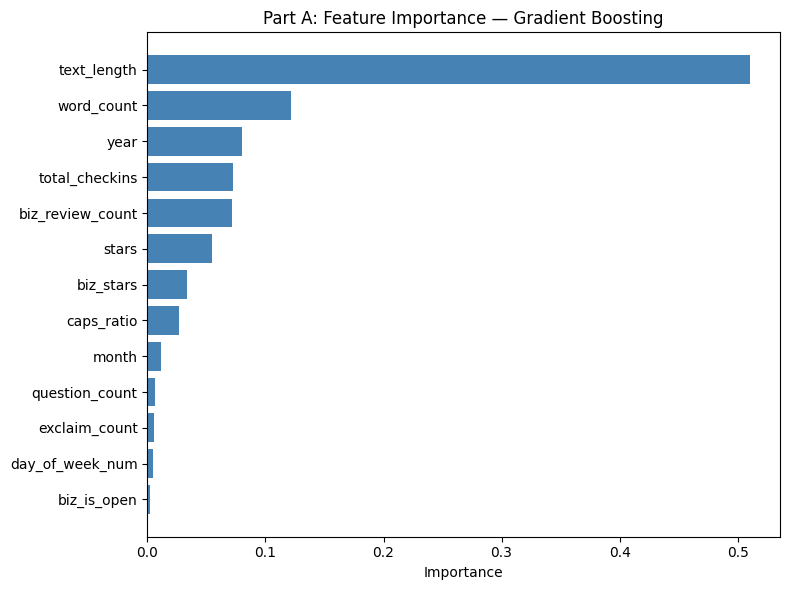

In [ ]:
best_cls_name = results_df.iloc[0]["Model"]
best_cls_model = models_cls[best_cls_name]
print(f"Best classification model by AUC: {best_cls_name}")

if hasattr(best_cls_model, "feature_importances_"):
    importances = best_cls_model.feature_importances_
elif hasattr(best_cls_model, "coef_"):
    importances = np.abs(best_cls_model.coef_[0])
else:
    importances = None

if importances is not None:
    feat_imp = pd.DataFrame({
        "Feature": feature_cols,
        "Importance": importances
    }).sort_values("Importance", ascending=True)

    plt.figure(figsize=(8, 6))
    plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="steelblue")
    plt.title(f"Part A: Feature Importance — {best_cls_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

PART B: REGRESSION (Predict Useful Vote Count)

*   Train Regression Models

In [ ]:
print("="*60)
print("   PART B: REGRESSION — Predict Number of Useful Votes")
print("="*60)
print(f"\nTarget: raw 'useful' vote count")
print(f"Features used ({len(feature_cols)}): {feature_cols}\n")

models_reg = {
    "Linear Regression":   LinearRegression(),
    "Decision Tree":       DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest":       RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    "Gradient Boosting":   GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42),
}

reg_results = []

for name, model in models_reg.items():
    print(f"\n--- Training {name} ---")

    if name == "Linear Regression":
        model.fit(X_train_sc, y_train_reg)
        y_pred = model.predict(X_test_sc)
        cv_scores = cross_val_score(model, X_train_sc, y_train_reg, cv=5,
                                     scoring="neg_root_mean_squared_error")
    else:
        model.fit(X_train, y_train_reg)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train_reg, cv=5,
                                     scoring="neg_root_mean_squared_error")

    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    mae  = mean_absolute_error(y_test_reg, y_pred)
    r2   = r2_score(y_test_reg, y_pred)
    cv_rmse = -cv_scores.mean()

    print(f"  CV RMSE: {cv_rmse:.4f} | Test RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

    reg_results.append({
        "Model": name, "CV_RMSE": round(cv_rmse, 4),
        "Test_RMSE": round(rmse, 4), "MAE": round(mae, 4), "R2": round(r2, 4)
    })

   PART B: REGRESSION — Predict Number of Useful Votes

Target: raw 'useful' vote count
Features used (13): ['stars', 'year', 'month', 'day_of_week_num', 'text_length', 'word_count', 'exclaim_count', 'question_count', 'caps_ratio', 'biz_stars', 'biz_review_count', 'biz_is_open', 'total_checkins']


--- Training Linear Regression ---
  CV RMSE: 3.3822 | Test RMSE: 3.4842 | MAE: 1.1830 | R²: 0.0769

--- Training Decision Tree ---
  CV RMSE: 3.9444 | Test RMSE: 4.1188 | MAE: 1.1965 | R²: -0.2899

--- Training Random Forest ---
  CV RMSE: 3.3380 | Test RMSE: 3.3584 | MAE: 1.1781 | R²: 0.1424

--- Training Gradient Boosting ---
  CV RMSE: 3.3565 | Test RMSE: 3.3462 | MAE: 1.1454 | R²: 0.1486


In [ ]:
print("="*60)
print("   PART B: REGRESSION MODEL COMPARISON")
print("="*60)
reg_results_df = pd.DataFrame(reg_results).sort_values("Test_RMSE")
print(reg_results_df.to_string(index=False))

   PART B: REGRESSION MODEL COMPARISON
            Model  CV_RMSE  Test_RMSE    MAE      R2
Gradient Boosting   3.3565     3.3462 1.1454  0.1486
    Random Forest   3.3380     3.3584 1.1781  0.1424
Linear Regression   3.3822     3.4842 1.1830  0.0769
    Decision Tree   3.9444     4.1188 1.1965 -0.2899


*   Actual vs Predicted Plot

Best regression model by RMSE: Gradient Boosting


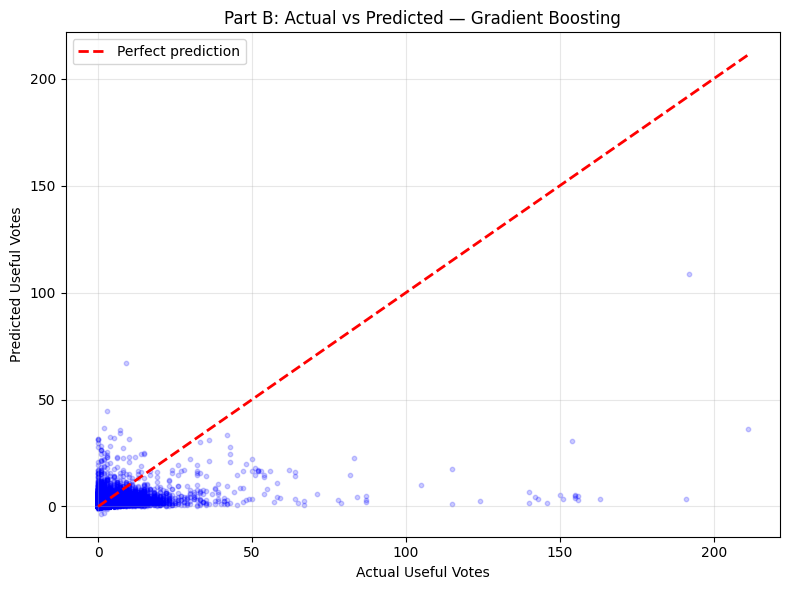

In [ ]:
best_reg_name = reg_results_df.iloc[0]["Model"]
best_reg_model = models_reg[best_reg_name]
print(f"Best regression model by RMSE: {best_reg_name}")

if best_reg_name == "Linear Regression":
    y_pred_best = best_reg_model.predict(X_test_sc)
else:
    y_pred_best = best_reg_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_best, alpha=0.2, s=10, color="blue")
max_val = max(y_test_reg.max(), y_pred_best.max())
plt.plot([0, max_val], [0, max_val], "r--", lw=2, label="Perfect prediction")
plt.xlabel("Actual Useful Votes")
plt.ylabel("Predicted Useful Votes")
plt.title(f"Part B: Actual vs Predicted — {best_reg_name}")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

*   Residual Distribution

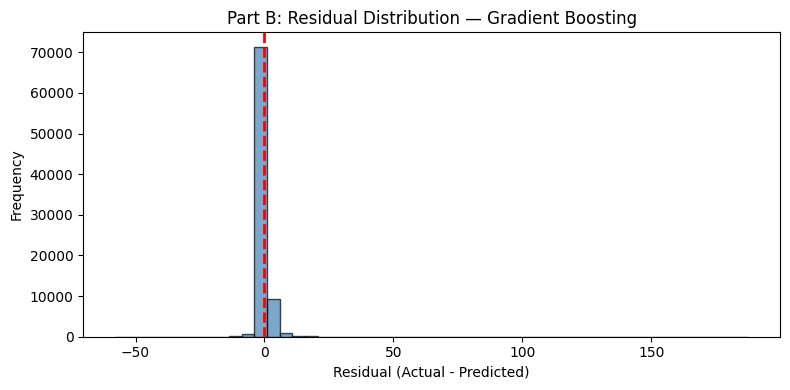


Mean residual: -0.0068
Std residual:  3.3462

   PREDICTIVE ANALYSIS COMPLETE


In [ ]:
residuals = y_test_reg - y_pred_best

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50, edgecolor="black", alpha=0.7, color="steelblue")
plt.axvline(0, color="red", linestyle="--", lw=2)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title(f"Part B: Residual Distribution — {best_reg_name}")
plt.tight_layout()
plt.show()

print(f"\nMean residual: {residuals.mean():.4f}")
print(f"Std residual:  {residuals.std():.4f}")

print("\n" + "="*60)
print("   PREDICTIVE ANALYSIS COMPLETE")
print("="*60)